<a href="https://colab.research.google.com/github/SohaibAShah/FCC_ML_Python/blob/main/TitanicPreidiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.compat.v2.feature_column as fc
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [3]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') #train
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') #test
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [4]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [6]:
dftrain.shape

(627, 9)

In [7]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


<Axes: >

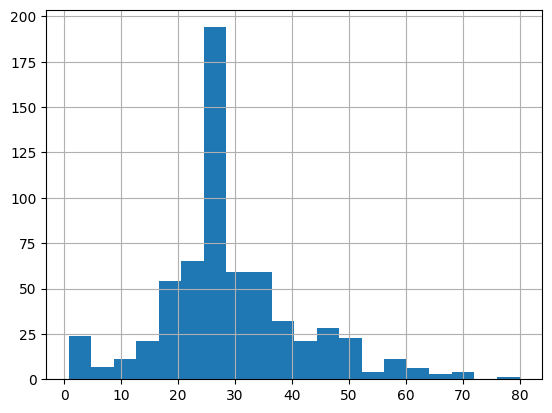

In [8]:
dftrain.age.hist(bins=20)

<Axes: >

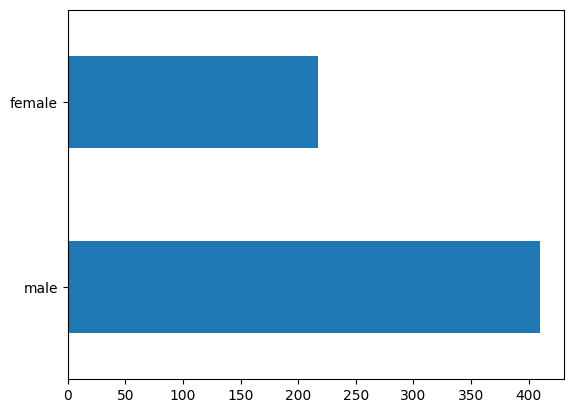

In [10]:
dftrain.sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% Survived')

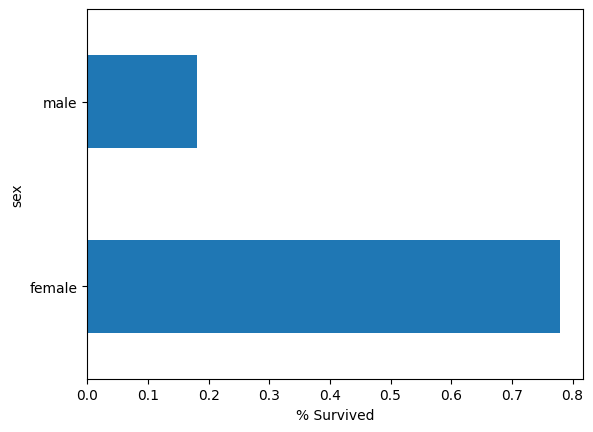

In [12]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% Survived')

Text(0.5, 0, '% Survived')

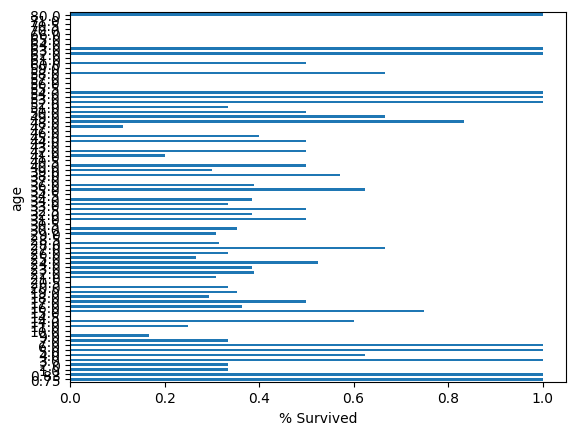

In [13]:
pd.concat([dftrain, y_train], axis=1).groupby('age').survived.mean().plot(kind='barh').set_xlabel('% Survived')

Text(0.5, 0, '% Survived')

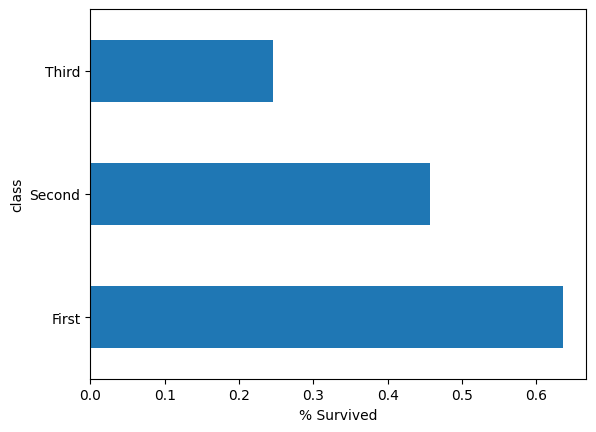

In [14]:
pd.concat([dftrain, y_train], axis=1).groupby('class').survived.mean().plot(kind='barh').set_xlabel('% Survived')

Text(0.5, 0, '% Survived')

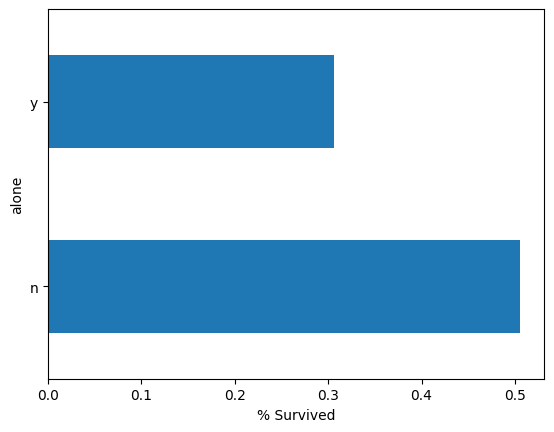

In [15]:
pd.concat([dftrain, y_train], axis=1).groupby('alone').survived.mean().plot(kind='barh').set_xlabel('% Survived')